<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

Following the hint of the exercise, we will focus on the log-likelihoo instead of the likelihood. The likelihood function for a set of data samples $(x_1, x_2, ..., x_n)$ from a Poisson distribution with parameter $\lambda$ is given by:

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} e^{-\lambda}
$$

Taking the logarithm of the likelihood and applying the logarithmic property exposed in Ass.1, we get:

$$
\ln(\mathcal{L}(\lambda)) = \ln\left(\prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} e^{-\lambda}\right)
$$

$$
= \sum_{i=1}^{n} \ln\left(\frac{\lambda^{x_{i}}}{x_{i}!} e^{-\lambda}\right)
$$

$$
= \sum_{i=1}^{n} \left( x_{i} \ln(\lambda) - \ln(x_{i}!) - \lambda \right)
$$

$$
= \sum_{i=1}^{n} x_{i} \ln(\lambda) - \sum_{i=1}^{n} \ln(x_{i}!) - n\lambda
$$

To find the $\lambda$ that maximized the function, we have to take the first derivative of the function $\ln(\mathcal{L}(\lambda))$ and set it to zero (Fermat Theorem):

$$
\frac{d}{d\lambda} \ln(\mathcal{L}(\lambda)) = \sum_{i=1}^{n} \frac{x_{i}}{\lambda} - n = 0
$$

$$
\sum_{i=1}^{n} \frac{x_{i}}{\lambda} = n
$$

$$
\frac{1}{\lambda} \sum_{i=1}^{n} x_{i} = n
$$

$$
\lambda = \frac{1}{n} \sum_{i=1}^{n} x_{i}
$$

The formula for $\lambda$ match the exercise request

In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [4]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


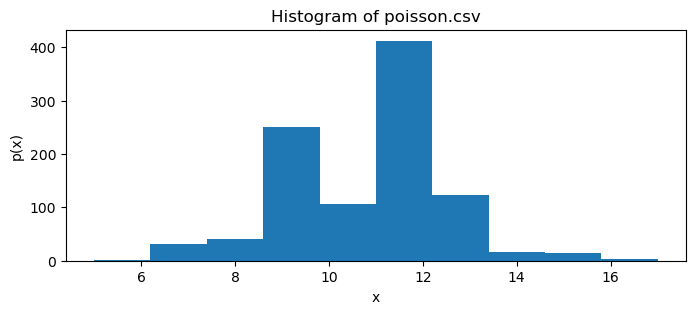

In [5]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [6]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [7]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [8]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ########## YOUR SOLUTION HERE ##########  
    lam_max_formula = np.sum(X) / len(X) # to match the formula found in exercise 1. Eventually, np.mean(X) can be directly used
    return lam_max_formula

In [9]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [10]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    ########## YOUR SOLUTION HERE ##########

    # Find the index of the maximum log-likelihood
    max_index = np.argmax(loglikelih)
    
    # Find the lambda value that corresponds to this maximum log-likelihood index
    lam_max = lam_set[max_index]

    # Find the minimum and maximum log-likelihood values
    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max

In [11]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

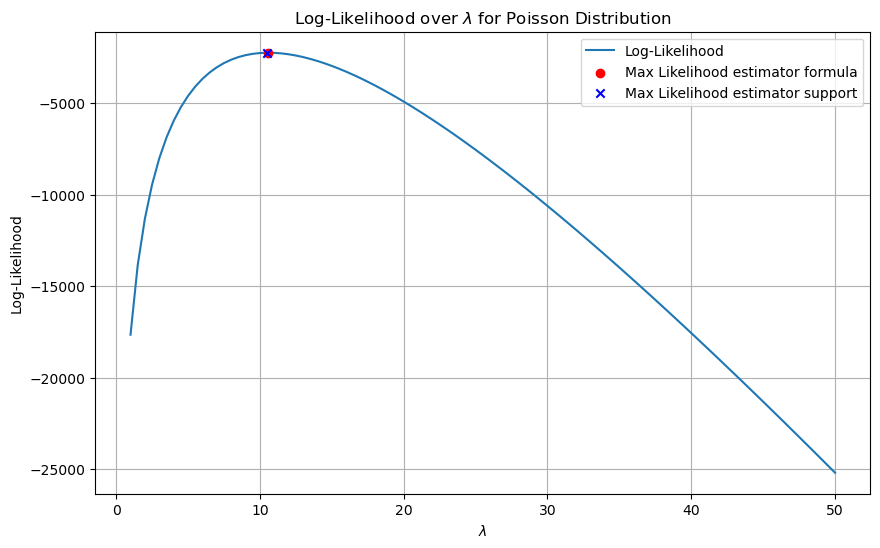

In [19]:
########## YOUR SOLUTION HERE ##########

# Plot the loglikelihood function over lam_set
plt.figure(figsize=(10, 6))
plt.plot(lam_set, loglikelih, label='Log-Likelihood')

# Mark the maxima according to estimator_formula
plt.scatter([lam_max_formula], [loglikelihood(X, lam_max_formula)], color='red', 
            label='Max Likelihood estimator formula', zorder=5)

# Mark the maxima according to estimator_support
plt.scatter([lam_max], [loglikelihood(X, lam_max)], color='blue', marker='x', 
            label='Max Likelihood estimator support', zorder=5)

plt.title(r'Log-Likelihood over $\lambda$ for Poisson Distribution')
plt.xlabel(r'$\lambda$')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########

From the calculations:
- The `estimator_formula` method directly computes $\hat{\lambda}$ as the average of the observed data points.
- The `estimator_support` method finds the maximum log-likelihood value among a predefined set of $\lambda$ values. This function strongly depends on the resolution of the $\lambda$ values.

The difference in the exact values of $\lambda$ comes from the discrete nature of the `lam_set`.

The plots visually confirm that the maximum likelihood can be found using the mean of the data.